
# **<center> Data Structures and Algorithms </center>**


## <center> Programming Session 2  </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1VwSOlAniiEuf3V4SmLbpAJUSusTS9Orn" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1mqoB_7h2H1da2F_BKfu94hR0FSIWSRRn?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

# The Stable Matching Problem

In [ ]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
from typing import List

---
## Introduction

The **Stable Matching Problem** involves finding a pairing between two equally sized sets, **men** $M$ and **women** $W$, such that the matching $\Phi$ is **stable**. A matching is stable if there is no **blocking pair** $(m, w)$, where:

1. $m \in M$ prefers $w$ over their current partner.  
2. $w \in W$ also prefers $m$ over their current partner.

Each individual has a preference ranking for members of the opposite set. The goal is to achieve a pairing where no blocking pair exists.

Below is an example representation of a matching problem. Each individual has their preferences listed, and the matching $\Phi$ is represented with red lines.

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1fei3C4TnGw22KjwjkEQhI3PsiqV8L0wm"></center>



Each individual in $\mathcal{M}$ and $\mathcal{W}$ has a **preference list** ranking members of the opposite set. These rankings reflect their relative desirability for being paired. A matching $\Phi$ is said to be **stable** if:

- Every participant is matched to exactly one partner.  
- There is no **blocking pair** $(m, w)$, where:
  - $m \in \mathcal{M}$ prefers $w$ over their current match in $\Phi$.  
  - $w \in \mathcal{W}$ also prefers $m$ over their current match in $\Phi$.







A stable matching ensures that no individual can improve their outcome by abandoning their current match to form a new pair with someone else.


## Real-World Applications

The stable matching problem has practical applications in many domains, such as:

- **Medical Residency Matching**: Graduating medical students are matched with hospitals based on mutual preferences.  
- **University Admissions**: Students are paired with universities or programs.  
- **Job Markets**: Job seekers and employers find mutually beneficial matches.  

These scenarios highlight the importance of an efficient and fair algorithm to find stable matchings.



## Preferences as Utilities

In some cases, preferences can be expressed as **utility values** between $0$ and $1$, where higher numbers indicate greater desirability. For example, a man $m$ might assign a utility of $0.9$ to a woman $w_1$ (highly desirable) and $0.2$ to $w_2$ (less desirable).

While utility values provide a quantitative perspective, the Gale-Shapley algorithm only considers **preference rankings** derived from these utilities.




---
<font color=green>Q1:</font>
<br><font color='green'>
Explain why the following figure is an example of an instability

</font>

---



<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1IfaBXrR2ccqOurXGlKfOMtWKJpr37p6g"></center>




---
Answer:

Mulan prefers Shang and Shang prefers Mulan too. They will both be happier if matched.

---

---
<font color=green>Q2:</font>
<br><font color='green'>
Explain how we can derive the preference rankings from the utilities

</font>

---

---
Answer:

From the natural order in $\mathbb{R}$

---

# The Gale-Shapley algorithm

## Vocabulary and Notation

- **Men ($M$)**: A set of individuals labeled $m_1, m_2, \dots, m_n$.  
- **Women ($W$)**: A set of individuals labeled $w_1, w_2, \dots, w_n$.  
- **Matching ($\Phi$)**: A set of pairs $(m, w)$ where $m \in \mathcal{M}$ and $w \in \mathcal{W}$, such that each individual appears in exactly one pair.  
- **Preferences**: Lists ranking members of the opposite set, e.g., $m_1$'s preference list might be $w_2 > w_1 > w_3$.  

---


## The Gale-Shapley algorithm


<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1J7fMqpS1vYlhoDaHXtsGrbIEuGh0sp49"></center>










---
<font color=green>Q3:</font>
<br><font color='green'>
Write the Gale-Shapley algorithm in Python following the pseudo-code provided. The algorithm should take as input the preferences of men and women and output the stable matching.

</font>

---



In [ ]:
def gale_shapley(men_preferences, women_preferences):
    """
    Implementation of Gale-Shapley stable matching algorithm using preference matrices.

    Args:
        men_preferences: n x n matrix where men_preferences[i][j] is the jth choice of man i
        women_preferences: n x n matrix where women_preferences[i][j] is the jth choice of woman i

    Returns:
        set: Stable matches as a set of tuples (man, woman).
    """
    n = len(men_preferences)

    # Initialize all men as free and track proposals
    free_men = list(range(n))  # All men are initially free
    proposals = np.zeros(n, dtype=int)  # Number of proposals made by each man
    women_partners = [-1] * n  # women_partners[i] = j means woman i is matched to man j

    # Main algorithm loop
    while free_men:
        m = free_men[0]  # Pick the first free man
        # Get the next woman on his preference list
        w = men_preferences[m][proposals[m]]
        proposals[m] += 1  # Increment the proposal index for this man

        if women_partners[w] == -1:
            # Woman is free
            women_partners[w] = m  # Engage the man and the woman
            free_men.pop(0)  # Remove the man from the free list
        else:
            # Woman is already engaged
            current_m = women_partners[w]
            # Check if the woman prefers the new man to her current partner
            if list(women_preferences[w]).index(m) < list(women_preferences[w]).index(current_m):
                women_partners[w] = m  # Engage the new man
                free_men.pop(0)  # Remove the new man from the free list
                free_men.append(current_m)  # Add the current partner to the free list
            # Otherwise, the woman rejects the new man (do nothing)

    # Construct the matches as a set of tuples
    matches = {(m, w) for w, m in enumerate(women_partners)}
    return matches


---
<font color=green>Q4:</font>
<br><font color='green'>
What is the time complexity of the algorithm ?

</font>

---

---
1. **Outer `while` Loop:**
   - The loop iterates while there are free men.
   - Each man can propose to at most \(n\) women (one proposal per woman in his preference list).
   - Total iterations of the `while` loop: **\(O(n^2)\)**.

2. **Inner Operation: `list.index()`**
   - Inside the `if` condition:
     ```python
     if list(women_preferences[w]).index(m) < list(women_preferences[w]).index(current_m):
     ```
   - The `list.index()` method performs a linear search to find the rank of a man in a woman’s preference list.
   - Searching in a list takes **\(O(n)\)** time.

3. **Total Complexity:**
   - In the worst case, every proposal requires a call to `list.index()`.
   - There are at most \(n^2\) proposals (one for each pair of men and women), and each `list.index()` operation takes \(O(n)\) time.
   - Total complexity:
     \[
     O(n^2) \times O(n) = O(n^3)
     \]


---

---
<font color=green>Q5:</font>
<br><font color='green'>
Change the algorithm to change the complexity from $O(n^3)$ to $O(n^2)$

</font>

---

By precomputing a rank matrix `women_ranks` for women’s preferences:
- **Precomputing `women_ranks`:**
  - Takes \(O(n^2)\) time to build the matrix.
- **Comparison Using Rank Matrix:**
  - Replace `list.index()` with:
    ```python
    if women_ranks[w][m] < women_ranks[w][current_m]:
    ```
  - This comparison is \(O(1)\).

Total Complexity of Optimized Algorithm

- **Precomputing:** \(O(n^2)\).
- **Main Loop:**
  - At most \(n^2\) proposals × \(O(1)\) comparison = \(O(n^2)\).
- **Total Complexity:**
  \[
  O(n^2) + O(n^2) = O(n^2)
  \]

---

In [ ]:
def gale_shapley_efficient(men_preferences, women_preferences):
    """
    Implementation of Gale-Shapley stable matching algorithm using preference matrices.

    Args:
        men_preferences: n x n matrix where men_preferences[i][j] is the jth choice of man i
        women_preferences: n x n matrix where women_preferences[i][j] is the jth choice of woman i

    Returns:
        dict: Stable matches where keys are men (0 to n-1) and values are women (0 to n-1)
    """
    n = len(men_preferences)

    # Create rank matrices for O(1) preference comparison
    women_ranks = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            women_ranks[i][women_preferences[i][j]] = j

    # Initialize all men as free and track proposals
    free_men = list(range(n))  # All men are initially free
    proposals = np.zeros(n, dtype=int)  # Number of proposals made by each man
    women_partners = [-1] * n  # women_partners[i] = j means woman i is matched to man j

    # Main algorithm loop
    while free_men:
        m = free_men[0]  # Pick the first free man
        # Get the next woman on his preference list
        w = men_preferences[m][proposals[m]]
        proposals[m] += 1  # Increment the proposal index for this man

        if women_partners[w] == -1:
            # Woman is free
            women_partners[w] = m  # Engage the man and the woman
            free_men.pop(0)  # Remove the man from the free list
        else:
            # Woman is already engaged
            current_m = women_partners[w]
            # If the woman prefers the new man to her current partner
            if women_ranks[w][m] < women_ranks[w][current_m]:
                women_partners[w] = m  # Engage the new man
                free_men.pop(0)  # Remove the new man from the free list
                free_men.append(current_m)  # Add the current partner to the free list

    # Construct the matches as a dictionary
    matches = {m: w for w, m in enumerate(women_partners)}
    return matches

---
<font color=green>Q6:</font>
<br><font color='green'>
Apply the Gale-Shapley algorithm to the following preference lists and provide the resulting stable matching.

</font>

---

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1sXV8X-cdAe-oIDUcQEJjZBykBNYs27Yj"></center>




In [ ]:
# Step 1: Dictionaries for Men and Women
men_to_int = {
    "Ross": 0,
    "Chandler": 1,
    "Joey": 2
}

women_to_int = {
    "Rachel": 0,
    "Phoebe": 1,
    "Monica": 2
}

# Reverse mappings for output
int_to_men = {v: k for k, v in men_to_int.items()}
int_to_women = {v: k for k, v in women_to_int.items()}

In [ ]:
# Men's preferences matrix
men_preferences = np.array([
    [0, 1, 2],  # Ross: Rachel > Phoebe > Monica
    [0, 2, 1],  # Chandler: Rachel > Monica > Phoebe
    [0, 2, 1]   # Joey: Rachel > Monica > Phoebe
])

# Women's preferences matrix
women_preferences = np.array([
    [0, 1, 2],  # Rachel: Ross > Chandler > Joey
    [1, 0, 2],  # Phoebe: Chandler > Ross > Joey
    [1, 2, 0]   # Monica: Chandler > Joey > Ross
])

In [ ]:
# Run the algorithm
stable_matching = gale_shapley(men_preferences, women_preferences)

print("Gale-Shapley Couples:")
print("--------------------")
# Convert the set of tuples into a formatted output
for (man, woman) in stable_matching:
    print(f"{int_to_men[man]} is matched with {int_to_women[woman]}")

Gale-Shapley Couples:
--------------------
Chandler is matched with Monica
Joey is matched with Phoebe
Ross is matched with Rachel


---
<font color=green>Q7:</font>
<br><font color='green'>
Compare the result of your code to the one obtained during the lecture.

</font>

---

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1y0gNgdNUEw0N9NSK2QItr8JcPR1biyoJ"></center>



# Optimality of the Gale-Shapley algorithm

### Analyzing the Fairness of the Gale-Shapley Matching Algorithm for Students and Universities

If we use the Gale-Shapley transformation, $\phi_{GS}$, in high-stakes applications like matching students to universities, does it significantly matter which side is the proposer? In theoretical toy examples, it does make a noticeable difference; in some cases, the universities (acceptors) received only 60% of their potential utility, while the students (proposers) received up to 100%.

To investigate this question, we analyze randomized preference arrays and evaluate their performance. However, these arrays should not be entirely random—they should abstractly reflect certain properties of the real world:

- **Common Value**: Some choices have intrinsic attributes that make them broadly desirable (or undesirable). For example, Harvard University might be universally regarded as an exceptional choice for many students. This universal appeal is captured by the **common factor** $\theta$.
- **Private Value**: Some choices have unique attributes that appeal to specific individuals. For instance, a student may prefer a university close to their hometown, even if it isn't highly ranked. This represents the **private value** of a choice.
- **Combination of Values**: Real-world scenarios often involve a mix of common and private values, where some choices are universally attractive while others cater to personal preferences.

To simulate these preferences, the function `preferences_students_universities(N, 0.75)` generates an $N \times N$ array of preferences. Each preference is determined as 75% common value ($\theta = 0.75$) and 25% private value. The private value is modeled as proportional to the ID number ($a$) in the code, implying that universities are ordered by increasing quality based on their ID numbers.




---
<font color=green>Q8:</font>
<br><font color='green'>
Write a function named `preprocess_preferences` that converts a preference matrix (with utilities as floating-point numbers) into ranked preferences (integer indices in descending order of preference).

**Input**:  
- A list of lists where each inner list represents an individual's preference scores for others (e.g., students' utilities for universities).  

**Output**:  
- A list of lists where each inner list contains integer indices ranked in descending order of preference.


</font>

---

In [1]:
def preprocess_preferences(preferences: List[List[float]]) -> List[List[int]]:
    """
    Convert a preference matrix with utilities into ranked preferences.

    Args:
        preferences: A list of lists where preferences[i][j] is the utility of choice j for individual i.

    Returns:
        list[list[int]]: Ranked preferences where each row contains integer indices in descending order of preference.
    """
    pass

NameError: name 'List' is not defined

---
<font color=green>Q9:</font>
<br><font color='green'>
Write a function named `gale_shapley_preferences` that applies the Gale-Shapley stable matching algorithm after preprocessing preference matrices with `preprocess_preferences`.

**Input**:  
- Two preference matrices (e.g., one for students and one for universities) containing utility values as floating-point numbers.

**Output**:  
- A set of stable matches represented as tuples `(student, university)`.

</font>

---

In [2]:
def gale_shapley_preferences(student_preferences, university_preferences):
    """
    Apply Gale-Shapley algorithm after preprocessing floating-point utilities into ranked preferences.

    Args:
        student_preferences: n x n matrix where student_preferences[i][j] is the utility of university j for student i.
        university_preferences: n x n matrix where university_preferences[i][j] is the utility of student j for university i.

    Returns:
        set: Stable matches as a set of tuples (student, university).
    """
    pass

In [ ]:
# Example usage
student_preferences = [
    [0.8, 0.9, 0.5, 0.6],
    [0.4, 0.3, 0.7, 0.2],
    [0.9, 0.6, 0.8, 0.5],
    [0.2, 0.1, 0.4, 0.3]
]

university_preferences = [
    [0.7, 0.6, 0.9, 0.5],
    [0.3, 0.8, 0.2, 0.4],
    [0.9, 0.7, 0.6, 0.8],
    [0.1, 0.2, 0.3, 0.4]
]

# Compute stable matches
matches = gale_shapley_preferences(student_preferences, university_preferences)
print("Stable matches:", matches)

Stable matches: {(1, 1), (0, 3), (2, 0), (3, 2)}


---
<font color=green>Q10:</font>
<br><font color='green'>
Write a function named `preferences_students_universities` that generates an NxN preference matrix for students and universities. The preferences should combine a common factor (weighted by \(	heta\)) and a private random factor (weighted by \(1 - 	heta\)).

**Input**:  
- `N`: The number of students and universities.  
- `theta`: The weight of the common factor.  

**Output**:  
- A list of lists where each row represents a student's utilities for all universities.


</font>

---

In [3]:
def preferences_students_universities(N=25, theta=0.75):
    """
    Create an NxN preference array for students and universities.

    Args:
        N (int): Number of students and universities (default: 25).
        theta (float): Common factor weight, between 0 and 1 (default: 0.75).

    Returns:
        list[list[float]]: NxN array of preferences for students/universities.

    The preferences are calculated as:
        theta × common value + (1 - theta) × random private value.
    """
    pass

---
<font color=green>Q11:</font>
<br><font color='green'>
Write a function named `examples_students_universities` that generates a list of pairs of preference matrices for students and universities.

**Input**:  
- `N`: The number of students and universities.  
- `theta`: The weight of the common factor.  
- `repeat`: The number of preference pairs to generate.  

**Output**:  
- A list of tuples where each tuple contains two NxN preference matrices.

</font>

---

In [4]:
def examples_students_universities(N=25, theta=0.5, repeat=10000):
    """
    Generate a list of pairs of preference arrays for students and universities.

    Args:
        N (int): Number of students and universities (default: 25).
        theta (float): Common factor weight, between 0 and 1 (default: 0.5).
        repeat (int): Number of pairs to generate (default: 10,000).

    Returns:
        list[tuple]: List of tuples, where each tuple contains:
                     - A preference array for students.
                     - A preference array for universities.
    """
    pass

---
<font color=green>Q12:</font>
<br><font color='green'>
Write a function named `mean_utilities_students_universities` that calculates the mean utility for students and universities based on a stable matching.

**Input**:  
- Two preference matrices (one for students and one for universities).  

**Output**:  
- A tuple containing the mean utility for students and the mean utility for universities.

</font>

---

In [5]:
def mean_utilities_students_universities(student_preferences, university_preferences):
    """
    Calculate mean utility for students and universities based on stable matching.

    Args:
        student_preferences: Preference matrix for students.
        university_preferences: Preference matrix for universities.

    Returns:
        tuple: Mean utility for students and universities.
    """
    pass

---
<font color=green>Q12:</font>
<br><font color='green'>
Write a function named `show_students_universities` that visualizes the utility distributions for students and universities using histograms. The function should also print the mean and standard deviation of utilities for both groups.

**Input**:  
- `N`: The number of students and universities.  
- `theta`: The weight of the common factor.  
- `repeat`: The number of simulations to generate.  
- `bins`: The number of bins for the histograms.  

**Output**:  
- Two histograms (one for students and one for universities) and printed summary statistics (mean and standard deviation).

</font>

---

In [ ]:
def transpose(matrix):
    """
    Transpose a matrix (helper function).

    Args:
        matrix: List of lists to transpose.

    Returns:
        list: Transposed matrix.
    """
    return list(zip(*matrix))


def show_students_universities(N=25, theta=0.5, repeat=10000, bins=50):
    """
    Show histograms of mean utility values for students and universities.

    Args:
        N (int): Number of students and universities (default: 25).
        theta (float): Common factor weight, between 0 and 1 (default: 0.5).
        repeat (int): Number of simulations to generate (default: 10,000).
        bins (int): Number of bins for the histograms (default: 50).

    Returns:
        None
    """
    # Generate examples and calculate mean utilities
    examples = examples_students_universities(N, theta, repeat)
    student_utilities, university_utilities = transpose(
        mean_utilities_students_universities(student_prefs, university_prefs)
        for student_prefs, university_prefs in examples
    )

    # Prepare data for visualization
    data = pd.DataFrame({
        'Utility': list(student_utilities) + list(university_utilities),
        'Group': ['Students'] * len(student_utilities) + ['Universities'] * len(university_utilities)
    })

    # Plot histograms using Seaborn
    sns.histplot(data, x='Utility', hue='Group', bins=bins, alpha=0.5, kde=True)
    plt.title(f'Utility Distribution (θ = {theta})')
    plt.xlabel('Mean Utility')
    plt.ylabel('Frequency')
    plt.show()

    # Print summary statistics
    print(f'''{repeat:,d} examples with N = {N} students and universities, common factor weight θ = {theta}
    Universities: Mean = {mean(university_utilities):.3f}, StdDev = {stdev(university_utilities):.3f}
    Students: Mean = {mean(student_utilities):.3f}, StdDev = {stdev(student_utilities):.3f}''')

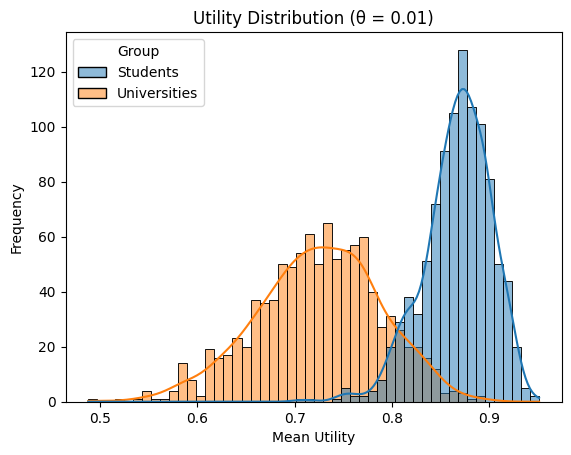

1,000 examples with N = 25 students and universities, common factor weight θ = 0.01
    Universities: Mean = 0.725, StdDev = 0.063
    Students: Mean = 0.867, StdDev = 0.034


In [ ]:
# Example usage
show_students_universities(N=25, theta=0.01, repeat=1000, bins=50)

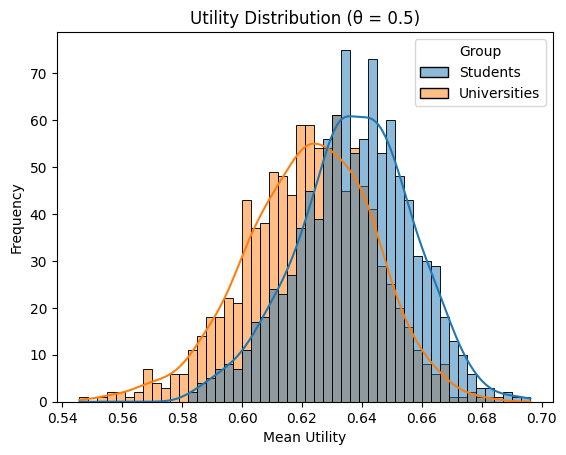

1,000 examples with N = 25 students and universities, common factor weight θ = 0.5
    Universities: Mean = 0.622, StdDev = 0.021
    Students: Mean = 0.637, StdDev = 0.019


In [ ]:
# Example usage
show_students_universities(N=25, theta=0.5, repeat=1000, bins=50)

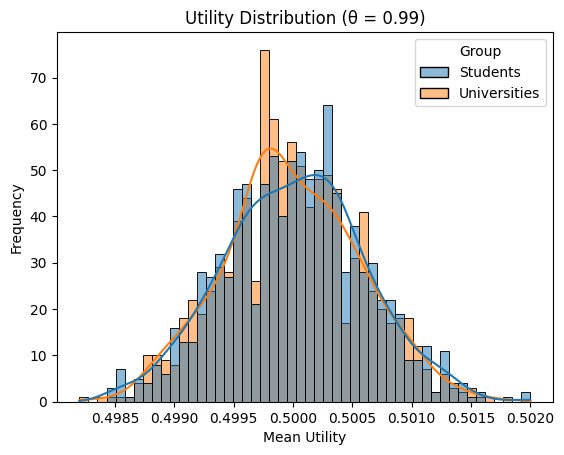

1,000 examples with N = 25 students and universities, common factor weight θ = 0.99
    Universities: Mean = 0.500, StdDev = 0.001
    Students: Mean = 0.500, StdDev = 0.001


In [ ]:
# Example usage
show_students_universities(N=25, theta=0.99, repeat=1000, bins=50)

### Observations from the Analysis

From the analysis, we find that:

- **When There is a Lot of Common Value ($\theta$ is High)**:
  - The Gale-Shapley algorithm is almost fair.
  - While the proposers (students) have a slight advantage, the difference in utility between students and universities is minimal.
  - This suggests it is reasonable to use the algorithm for matching in scenarios with high common value, such as matching students to prestigious universities or medical residents to hospitals, where there is widespread agreement on the quality of the choices.

- **When There is Mostly Private Value ($\theta$ is Low)**:
  - The algorithm becomes unfair, significantly favoring the proposers (students) over the acceptors (universities).
  - This highlights the importance of considering the balance of common and private value when applying the Gale-Shapley algorithm in real-world scenarios.



### Conclusion

In scenarios with high common value, the Gale-Shapley Matching Algorithm proves to be an effective and nearly fair method for matching students to universities. However, when private value dominates, the algorithm's fairness diminishes, favoring the proposers. Therefore, it is crucial to assess the balance between common and private values when using this algorithm for high-stakes applications.

### Contact

If you have any questions regarding this notebook, do not hesitate to contact: hachem.madmoun@gmail.com